# Проект - Компьютерные игры и рейтинг их продаж в магазине "Стримчик"

Цель: Выявить закономерности, определяющие успешность игры. Выявление потенциально популярного продукта для проведения рекламной компании.

Описание данных: Name — название игры Platform — платформа Year_of_Release — год выпуска Genre — жанр игры NA_sales — продажи в Северной Америке (миллионы проданных копий) EU_sales — продажи в Европе (миллионы проданных копий) JP_sales — продажи в Японии (миллионы проданных копий) Other_sales — продажи в других странах (миллионы проданных копий) Critic_Score — оценка критиков (максимум 100) User_Score — оценка пользователей (максимум 10) Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st

In [2]:
data_games = pd.read_csv('/datasets/games.csv')

In [3]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data_games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
#Посчитаем кол-во строк и столбцов

rows = len(data_games.axes[0])
cols = len(data_games.axes[1])
  

print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

Number of Rows: 16715
Number of Columns: 11


In [6]:
data_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Вывод: Загружены данные об играх до 2016 года об играх, их жанре, рейтинге, продажах в Японии, Северной Америке и Европе.
В датафрейме 16715 строк. Есть пропуски в категориях названия игр, года выпуска, оценке критиков, оценк пользователей и рейтинге от организации ESRB.

# Шаг 2. Подготовьте данные

In [7]:
# Заменим названия столбцов (приведем к нижнему регистру);

data_games.columns = data_games.columns.str.lower()

In [8]:
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
data_games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [10]:
# Для экономии памяти поменяем float64 на float32
data_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score']] = data_games[['na_sales', 
      'eu_sales', 
      'jp_sales', 
      'other_sales', 
      'critic_score'
      ]].apply(lambda x: x.astype('float32'))
data_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score']] = data_games[['na_sales', 
      'eu_sales', 
      'jp_sales', 
      'other_sales', 
      'critic_score'
      ]]

In [11]:
# год не может быть не целым числом, приведем оценку критиков и год в тип integer. Пока есть пропуски нет возможности 
# перевести в тип int64
data_games['year_of_release'] = pd.to_numeric(data_games['year_of_release'], downcast='integer')
data_games['critic_score'] = pd.to_numeric(data_games['critic_score'], downcast='integer')

# приведем user_score в тип float и округлим значения. В столбце есть значение "tbd" - то есть еще нет оценки,
# поэтому эти значения можно заменить на NaN 
data_games['user_score'] = pd.to_numeric(data_games['user_score'], downcast='float', errors ='coerce')
data_games['user_score'] = data_games['user_score'].round(1)

In [12]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float32
 5   eu_sales         16715 non-null  float32
 6   jp_sales         16715 non-null  float32
 7   other_sales      16715 non-null  float32
 8   critic_score     8137 non-null   float32
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
dtypes: float32(6), float64(1), object(4)
memory usage: 1.0+ MB


In [13]:
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

critic_score и user_score. В этих столбцах нельзя восстановить значения и заменить их средним или медианным, потому что для каждой строки оценка - это индивидуальное значение. 

In [14]:
# Удалим строки с пропущенным названием, они не подлежат восстановлению
data_games[data_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
data_games.drop([659, 14244],inplace=True)
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float32
 5   eu_sales         16713 non-null  float32
 6   jp_sales         16713 non-null  float32
 7   other_sales      16713 non-null  float32
 8   critic_score     8137 non-null   float32
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
dtypes: float32(6), float64(1), object(4)
memory usage: 1.1+ MB


Те строки, в которых год пропущен, не имеют значения для аналитики, поэтому их можно удалить. Всего 269 значений пропущенных против 16 тысяч.

In [16]:
data_games.drop(data_games[data_games['year_of_release'].isna()].index,inplace=True)
data_games['year_of_release'] = pd.to_numeric(data_games['year_of_release'], downcast='integer')
data_games['year_of_release'] = data_games['year_of_release'].astype('int64')
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float32
 5   eu_sales         16444 non-null  float32
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     7983 non-null   float32
 9   user_score       7463 non-null   float32
 10  rating           9768 non-null   object 
dtypes: float32(6), int64(1), object(4)
memory usage: 1.1+ MB


In [17]:
#Заменим пропущенные значения на "undefiend"
data_games["rating"] = data_games['rating'].fillna("undefined")

### Удаление дубликатов

In [18]:
data_games.drop_duplicates()
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float32
 5   eu_sales         16444 non-null  float32
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     7983 non-null   float32
 9   user_score       7463 non-null   float32
 10  rating           16444 non-null  object 
dtypes: float32(6), int64(1), object(4)
memory usage: 1.1+ MB


In [19]:
part_data_games = data_games.loc[:, 'name':'year_of_release']
part_data_games.drop_duplicates()
part_data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             16444 non-null  object
 1   platform         16444 non-null  object
 2   year_of_release  16444 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 513.9+ KB


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [20]:
data_games['world_sales'] = (data_games['na_sales'] + data_games['eu_sales'] 
                                   + data_games['jp_sales'] + data_games['other_sales'])
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,undefined,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,undefined,31.380001


Вывод:

Произведена предобработка данных
Название столбцов было приведено к нижнему регистру
Восстановлены пропуски в строках, где это возможно
Удалены строки с данными непригодными для аналеа
Добавлен столбец суммарных продаж.

# Шаг 3: Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [21]:
data_games['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

                 games_count
year_of_release             
1980                       9
1981                      46
1982                      36
1983                      17
1984                      14
1985                      14
1986                      21
1987                      16
1988                      15
1989                      17
1990                      16
1991                      41
1992                      43
1993                      60
1994                     121
1995                     219
1996                     263
1997                     289
1998                     379
1999                     338
2000                     350
2001                     482
2002                     829
2003                     775
2004                     762
2005                     939
2006                    1006
2007                    1197
2008                    1427
2009                    1426
2010                    1255
2011                    1136
2012          

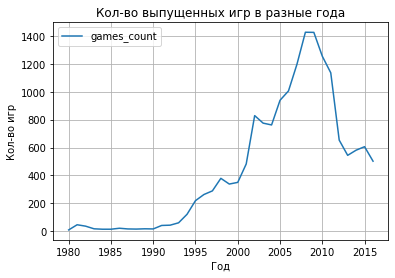

In [22]:
year_of_release_pivot_table = pd.pivot_table(data_games, index='year_of_release', values='name', aggfunc='count')
year_of_release_pivot_table.columns = ['games_count']
print(year_of_release_pivot_table)
year_of_release_pivot_table.plot()

plt.title('Кол-во выпущенных игр в разные года')
plt.xlabel('Год')
plt.ylabel('Кол-во игр')
plt.grid()
plt.show()


Данные за весь период не важны.

С 1980 годов по 1993 было выпущено мало игр, маленькие охваты. Далее появился персональный компьютер и начался рост выпуска игр.

В 2002 году есть небольшой всплеск выпуска игр. Это может быть связано с выпуском новых движков и развития программирования.

Есть пик в 2009 году. 

Спад индустрии игр с 2012 по 2016 обусловлен экономическим кризисом и требованиями покупателей, как следствие долгой разработкой игр. 

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построем распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [23]:
platform_pivot_table = pd.pivot_table(data_games, index=['platform'], values='world_sales', aggfunc='sum')
platform_pivot_table = platform_pivot_table.sort_values('world_sales',ascending=False)
platform_pivot_table

,world_sales
platform,
PS2,1233.559937
X360,961.239990
PS3,931.339966
Wii,891.179993
DS,802.780029
PS,727.580017
PS4,314.140015
GBA,312.880005
PSP,289.529999


In [24]:
# Рассмотрим первую шестерку, так как потом спад почти на половину
best_sales_platform = list(platform_pivot_table.index[:6])
best_sales_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [25]:
for platform in best_sales_platform:
    print('Платформа', platform)
    platform_pivot_table = pd.pivot_table(data_games.query('platform == @platform'), index=['platform','year_of_release'], values='world_sales', aggfunc='sum')
    print(platform_pivot_table)
    print()

Платформа PS2
                          world_sales
platform year_of_release             
PS2      2000               39.170002
         2001              166.430008
         2002              205.380005
         2003              184.309998
         2004              211.809998
         2005              160.660004
         2006              103.419998
         2007               75.989998
         2008               53.900002
         2009               26.400000
         2010                5.640000
         2011                0.450000

Платформа X360
                          world_sales
platform year_of_release             
X360     2005                8.250000
         2006               51.619999
         2007               95.409996
         2008              135.259995
         2009              120.290001
         2010              170.029999
         2011              143.839996
         2012               99.739998
         2013               88.580002
         2014       

In [26]:
#  Рассмотрим данные для PS4 для полной картины
print('Платформа ','PS4')
platform_pivot_table = pd.pivot_table(data_games.query('platform == "PS4"'), 
                                            index=['platform','year_of_release'], 
                                            values='world_sales', aggfunc='sum')
print(platform_pivot_table)
print()

Платформа  PS4
                          world_sales
platform year_of_release             
PS4      2013               25.990000
         2014              100.000000
         2015              118.900002
         2016               69.250000



Самые популярные платформы используются в течение 8-12 лет. В список популярных платформ попали несколько поколений PS. 

PS 1994-2003
PS2 2000-2011
PS3 2006-2016
PS4 2013-2016

Каждые 6 лет примерно выпускались платформы. И примерно 3-5 лет существует предыдущая версия платформ.

3 вопрос и 4 вопрос. Возьмем данные за соответствующий актуальный период. 
Возьмем данные с 2013 по 2016. Так как если игра создается в течение 2-4 лет, то в 2017 год будут игры, которые начали разрабатывать в 2013 году. PS4 просуществует на рынке еще 2-4 года и топ продаж придется как раз на 2017 год. 
После 2013 года падение суммарных продаж, что произошло скорее всего в следствие того, что появилась тенденция уделять больше внимания качеству игры. 

In [27]:
actual_data_games = data_games.query('year_of_release > 2012')
actual_data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float32
 5   eu_sales         2233 non-null   float32
 6   jp_sales         2233 non-null   float32
 7   other_sales      2233 non-null   float32
 8   critic_score     991 non-null    float32
 9   user_score       1192 non-null   float32
 10  rating           2233 non-null   object 
 11  world_sales      2233 non-null   float32
dtypes: float32(7), int64(1), object(4)
memory usage: 165.7+ KB


In [28]:
actual_data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.049999
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.270000
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.630000
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,undefined,14.599999
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.620001


5 вопрос. Определим самые прибыльные платформы за актуальный период

In [29]:
# составим таблицу только по платформам, годам и продажам
best_sales_platform = pd.pivot_table(actual_data_games, index=['platform','year_of_release'], 
                                     values='world_sales', aggfunc = 'sum')
best_sales_platform

world_sales
platform year_of_release             
3DS      2013               56.570000
         2014               43.759998
         2015               27.780001
         2016               15.140000
DS       2013                1.540000
PC       2013               12.380000
         2014               13.280001
         2015                8.520000
         2016                5.250000
PS3      2013              113.250000
         2014               47.759998
         2015               16.820000
         2016                3.600000
PS4      2013               25.990000
         2014              100.000000
         2015              118.900002
         2016               69.250000
PSP      2013                3.140000
         2014                0.240000
         2015                0.120000
PSV      2013               10.590000
         2014               11.900000
         2015                6.250000
         2016                4.250000
Wii      2013                8.590000
         2014                3.750000
         2015                1.140000
         2016                0.180000
WiiU     2013               21.650000
         2014               22.030001
         2015               16.350000
         2016                4.600000
X360     2013               88.580002
         2014               34.740002
         2015               11.960000
         2016                1.520000
XOne     2013               18.960001
         2014               54.070000
         2015               60.139999
         2016               26.150000

In [30]:
# составим рейтинг, проссумируем продажи для платформ по годам
best_sales_platform = pd.pivot_table(actual_data_games, index='platform', 
                                     values='world_sales', aggfunc = 'sum')
best_sales_platform.sort_values('world_sales', ascending=False)

,world_sales
platform,
PS4,314.140015
PS3,181.429993
XOne,159.320007
3DS,143.250000
X360,136.800003
WiiU,64.629997
PC,39.430000
PSV,32.989998
Wii,13.660000


Топ 5 платформ по миру: PS4, PS3, XOne, 3DS и X360. 

Продажи растут у PS4, XOne, WiiU и PSV, PC. Продажи падают у приставок PS3, X360, DS, Wii и PSP - это приставки предудыщего поколения.

Потенциально прибыльные - платформы нового поколения

6 вопрос. Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

(0.0, 5.0)

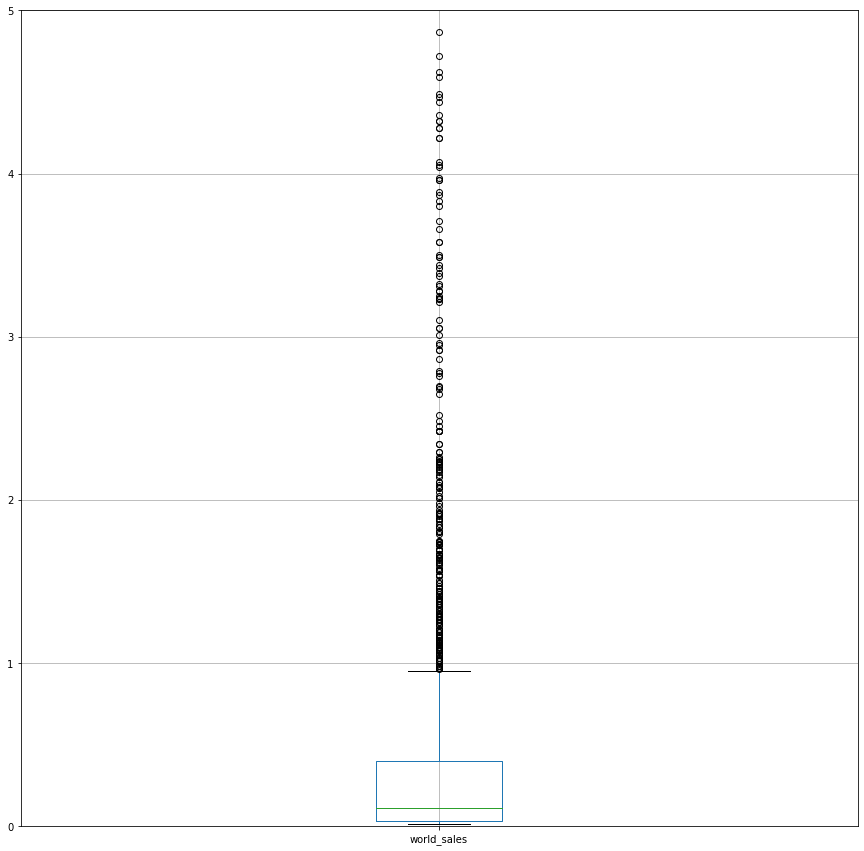

In [31]:
boxplot = actual_data_games.boxplot(column = 'world_sales', figsize=(15,15))
actual_data_games['world_sales'].describe()

ymin, ymax = [0, 5]
boxplot.set_ylim([ymin, ymax])

Хорошо продаваемых игр единицы, большая часть игр не вышла на прибыль даже больше 500 тыс долларов.

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: world_sales, dtype: float64

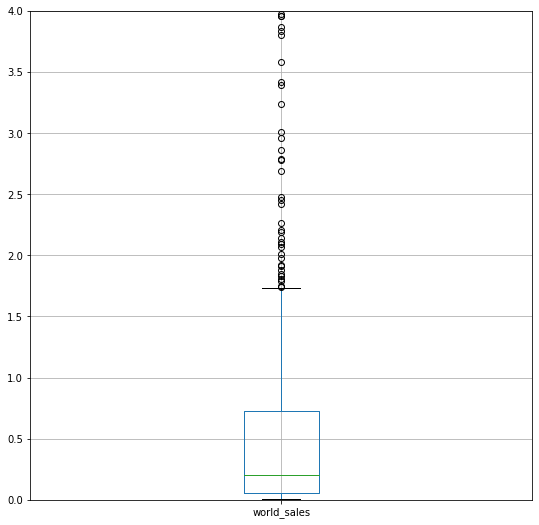

In [32]:
PS4_actual_data_games = actual_data_games.query('platform =="PS4"')
boxplot = PS4_actual_data_games.boxplot(column = 'world_sales', figsize=(9,9))


ymin, ymax = [0, 4]
boxplot.set_ylim([ymin, ymax])

PS4_actual_data_games['world_sales'].describe()

count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.049999
Name: world_sales, dtype: float64

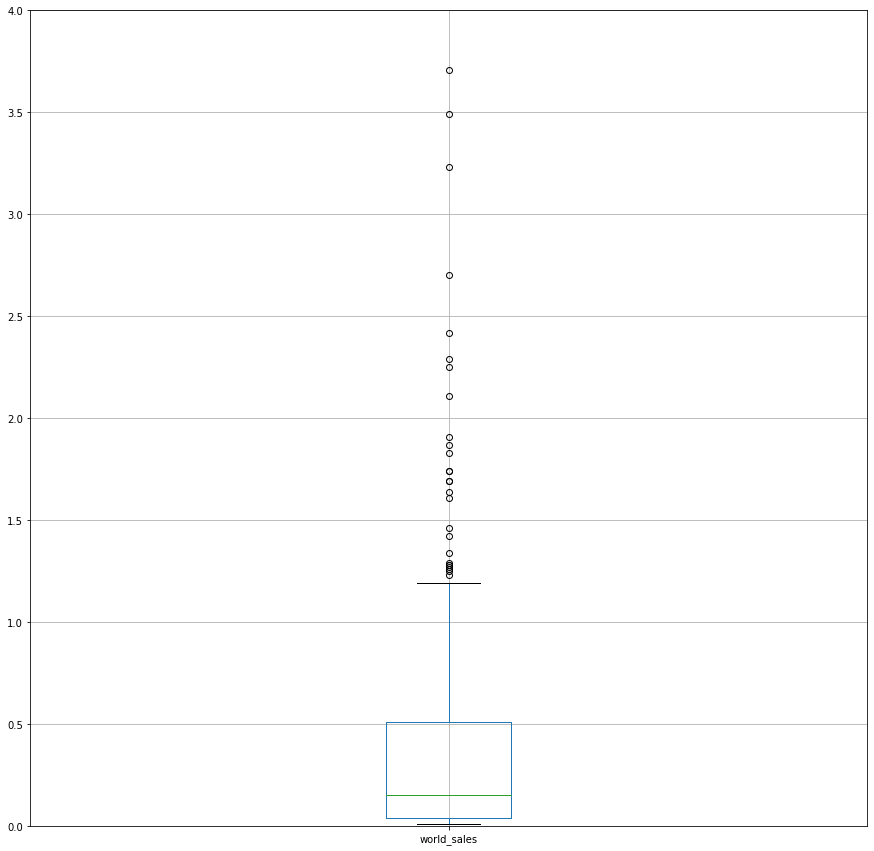

In [33]:
PS3_actual_data_games = actual_data_games.query('platform =="PS3"')
boxplot = PS3_actual_data_games.boxplot(column = 'world_sales',figsize=(15,15))

ymin, ymax = [0, 4]
boxplot.set_ylim([ymin, ymax])

PS3_actual_data_games['world_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: world_sales, dtype: float64

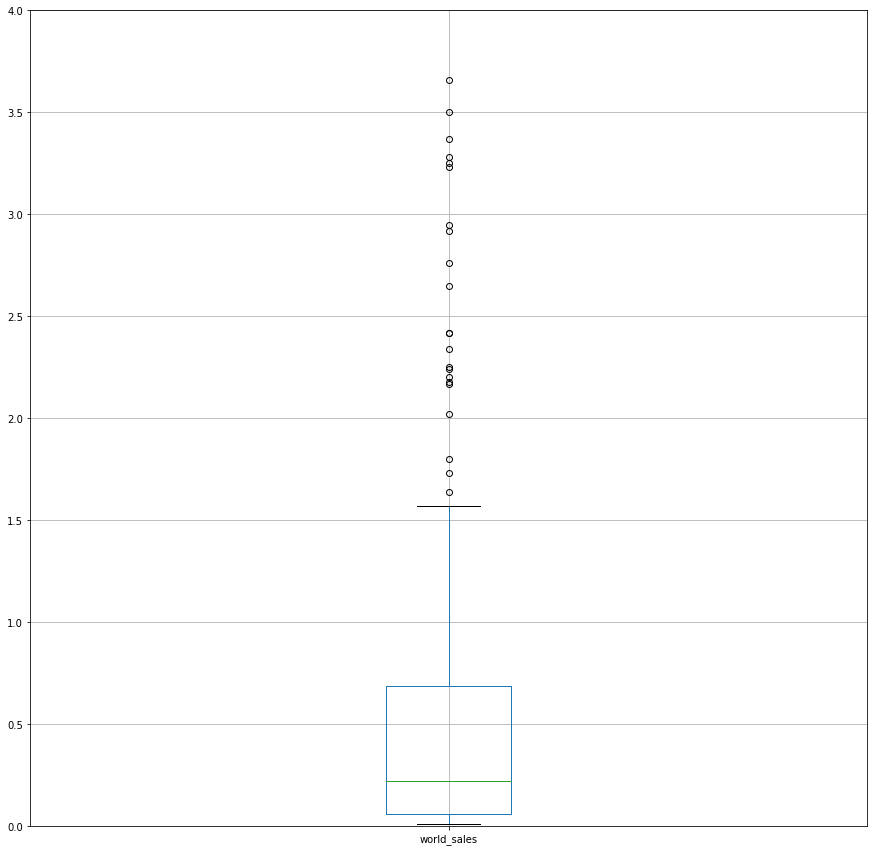

In [34]:
XOne_actual_data_games = actual_data_games.query('platform == "XOne"')
boxplot = XOne_actual_data_games.boxplot(column = 'world_sales', figsize=(15,15))

ymin, ymax = [0, 4]
boxplot.set_ylim([ymin, ymax])

XOne_actual_data_games['world_sales'].describe()

count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.599999
Name: world_sales, dtype: float64

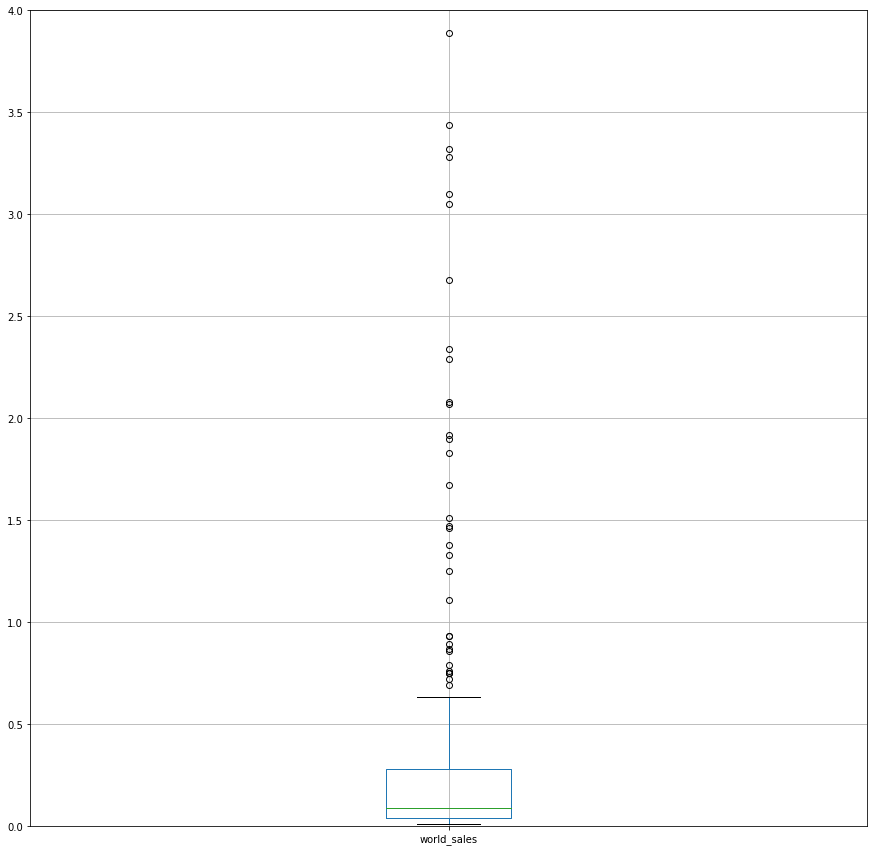

In [35]:
_3DS_actual_data_games = actual_data_games.query('platform == "3DS"')
boxplot = _3DS_actual_data_games.boxplot(column = 'world_sales', figsize=(15,15))

ymin, ymax = [0, 4]
boxplot.set_ylim([ymin, ymax])

_3DS_actual_data_games['world_sales'].describe()

count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: world_sales, dtype: float64

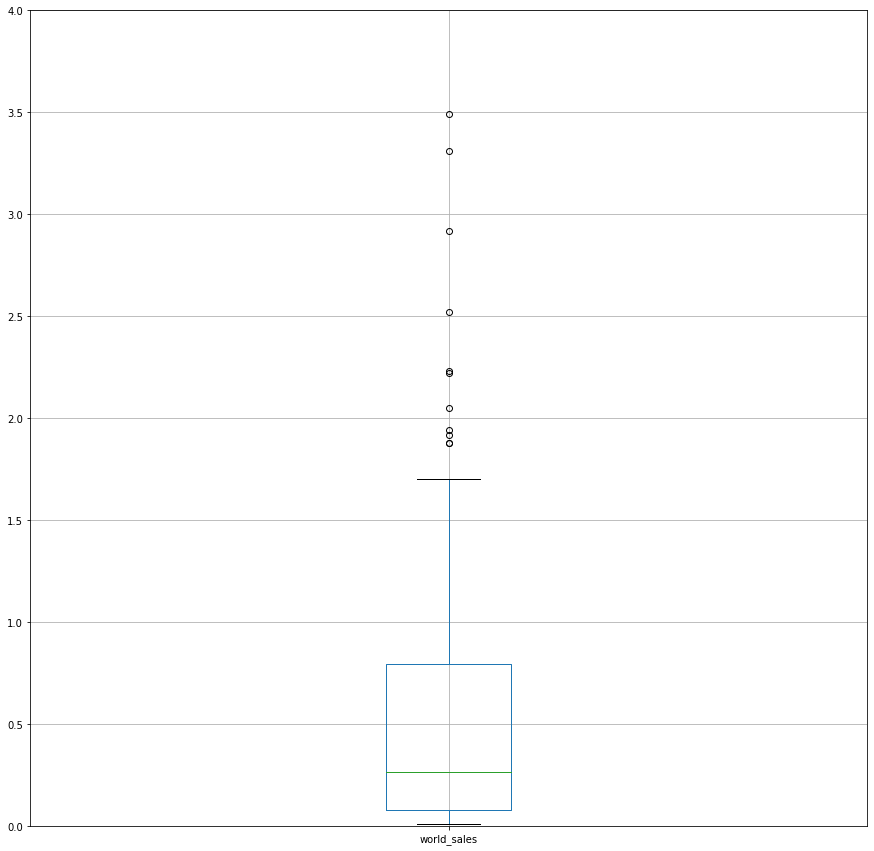

In [36]:
X360_actual_data_games = actual_data_games.query('platform =="X360"')
boxplot = X360_actual_data_games.boxplot(column = 'world_sales', figsize=(15,15))

ymin, ymax = [0, 4]
boxplot.set_ylim([ymin, ymax])

X360_actual_data_games['world_sales'].describe()

Text(0.5, 1.0, 'Распределение прибыли по платформам')

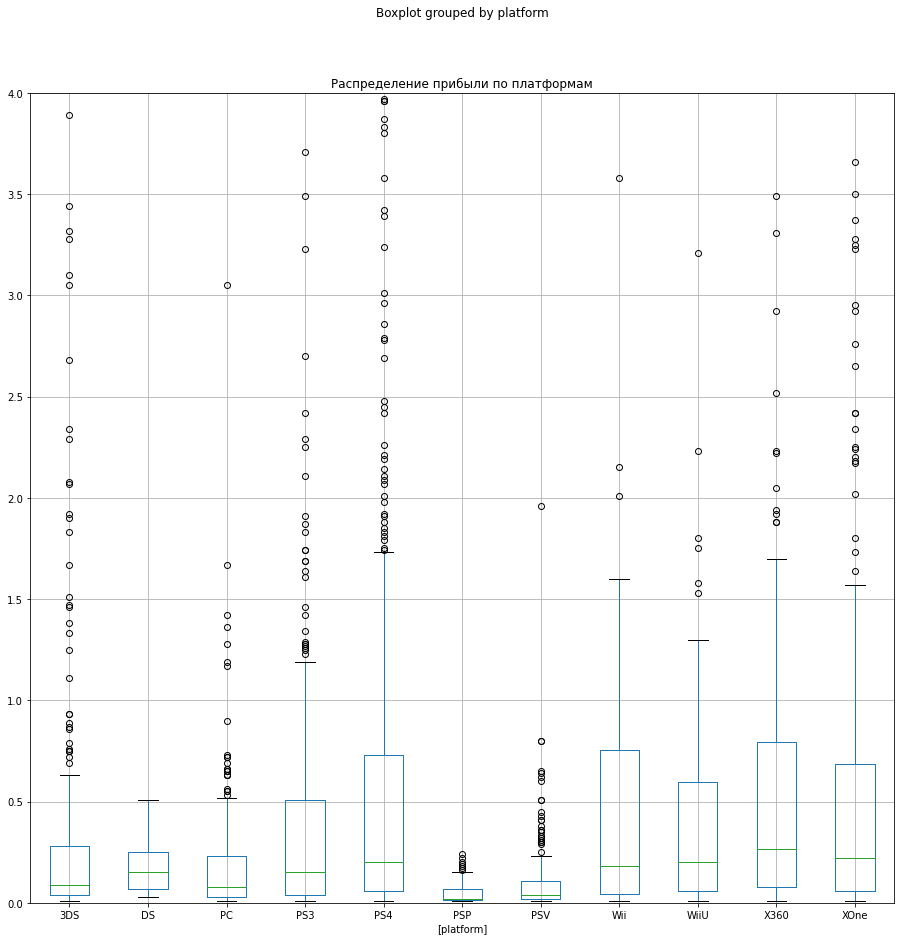

In [37]:
boxplot = actual_data_games.boxplot(column=['world_sales' ], by = ['platform'], figsize=(15,15))

ymin, ymax = [0, 4]
boxplot.set_ylim([ymin, ymax])
boxplot.set_title('Распределение прибыли по платформам')

Средняя выручка на игру по миру: 488 тыс. дол. 3/4 игр заработали до 400 тыс. Рекорд 21 млн.
Средняя выручка на игру по платформе PS4: 801 тыс. 3/4 игр заработали до 730 тыс. Рекорд 14,6 млн.
Средняя выручка на игру по платформе PS3: 526 тыс. 3/4 игр заработали до 510 тыс. Рекорд 21 млн.
Средняя выручка на игру по платформе XOne: 645 тыс. 3/4 игр заработали до 685 тыс. Рекорд 7,4 млн.
Средняя выручка на игру по платформе X360: 735 тыс. 3/4 игр заработали до 795 тыс. Рекорд 16,3 млн.
Средняя выручка на игру по платформе 3DS: 472 тыс. 3/4 игр заработали до 280 тыс. Рекорд 14,6 млн.

Для PS4, PS3 и 3DS есть тенденция к росту продаж. Среднее значение больше 3-го квантиля, следовательно на этих платформах игры более популярные и продаваемые.

7 вопрос. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [38]:
PS4_critic_and_user_ratings = PS4_actual_data_games.loc[:,['world_sales', 'critic_score', 'user_score']]
PS4_critic_and_user_ratings.head()

,world_sales,critic_score,user_score
31,14.630000,NaN,NaN
42,12.620001,97.0,8.3
77,8.580000,82.0,4.3
87,7.980000,NaN,NaN
92,7.660000,83.0,5.7


In [39]:
PS4_critic_and_user_ratings.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


array([[<AxesSubplot:xlabel='world_sales', ylabel='world_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='world_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='world_sales'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

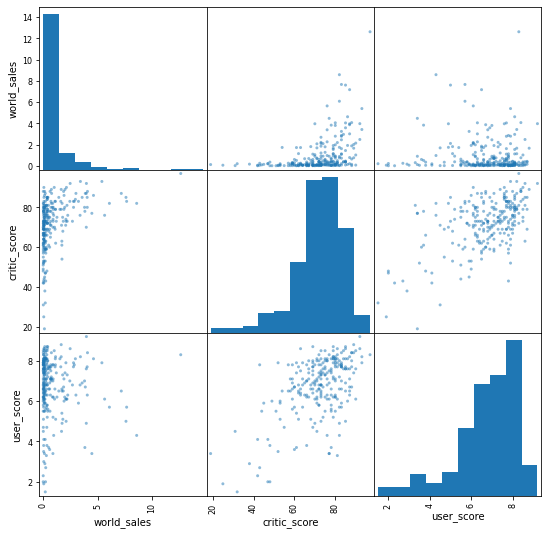

In [40]:
pd.plotting.scatter_matrix(PS4_critic_and_user_ratings, figsize=(9, 9))

Для платформы PS4 есть прямая корреляция между прибылью и рейтингом критиков. Чем выше оценивают игру критики, тем выше прибыль. Видимо оценка зависит от качества самой игры, отсюда и прибыль
Есть обратная связь с оценкой пользователей, но она не несет особой смысловой нагрузки

Также есть связь между оценкой игроков и критиков. Чем выше критик, оценивает игру, тем выше оценит ее и игрок.


8 вопрос. Соотнесем выводы с продажами игр на других платформах.

In [41]:
PS3_critic_and_user_ratings = PS3_actual_data_games.loc[:,['world_sales', 'critic_score', 'user_score']]
PS3_critic_and_user_ratings.head()

,world_sales,critic_score,user_score
16,21.049999,97.0,8.2
69,9.360000,71.0,2.6
126,6.460000,86.0,4.3
149,5.860001,95.0,9.1
180,5.270000,NaN,NaN


In [42]:
PS3_critic_and_user_ratings.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.334285,0.002394
critic_score,0.334285,1.000000,0.599920
user_score,0.002394,0.599920,1.000000


array([[<AxesSubplot:xlabel='world_sales', ylabel='world_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='world_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='world_sales'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

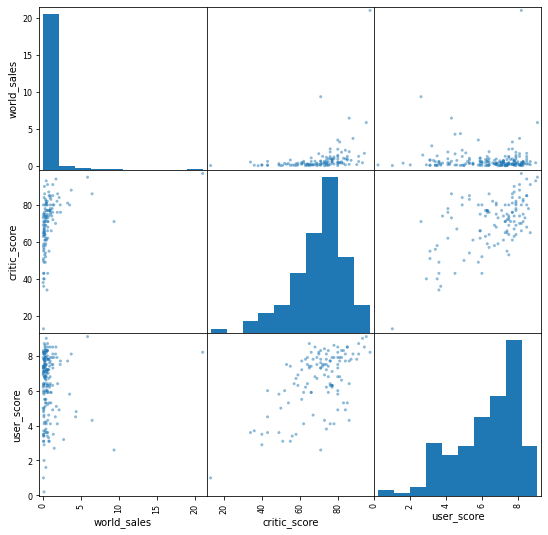

In [43]:
pd.plotting.scatter_matrix(PS3_critic_and_user_ratings, figsize=(9,9))

Зависимости для PS3 имеют похожие тенденции, как для платформы PS4 только менее явно выраженные

In [44]:
XOne_critic_and_user_ratings = XOne_actual_data_games.loc[:,['world_sales', 'critic_score', 'user_score']]
XOne_critic_and_user_ratings.head()

,world_sales,critic_score,user_score
99,7.39,NaN,NaN
165,5.47,97.0,7.9
179,5.26,81.0,5.4
242,4.49,84.0,6.4
270,4.22,88.0,6.2


In [45]:
XOne_critic_and_user_ratings.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


array([[<AxesSubplot:xlabel='world_sales', ylabel='world_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='world_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='world_sales'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

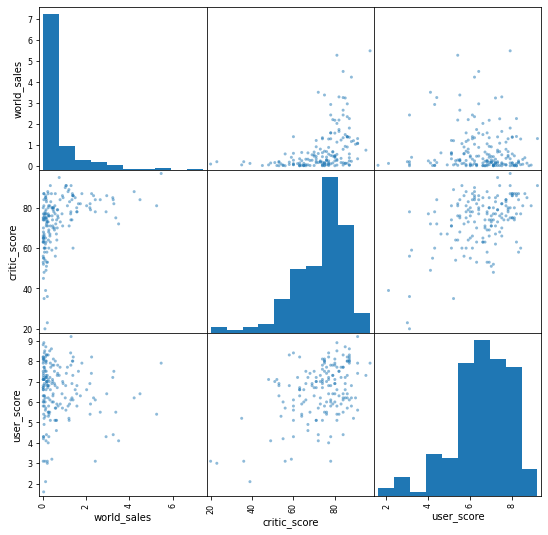

In [46]:
pd.plotting.scatter_matrix(XOne_critic_and_user_ratings, figsize=(9,9))

In [47]:
X360_critic_and_user_ratings = X360_actual_data_games.loc[:,['world_sales', 'critic_score', 'user_score']]
X360_critic_and_user_ratings.head()

,world_sales,critic_score,user_score
23,16.270000,97.0,8.1
60,10.240000,73.0,2.6
72,9.180001,NaN,NaN
263,4.280000,NaN,4.9
271,4.220000,84.0,4.2


In [48]:
X360_critic_and_user_ratings.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


array([[<AxesSubplot:xlabel='world_sales', ylabel='world_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='world_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='world_sales'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

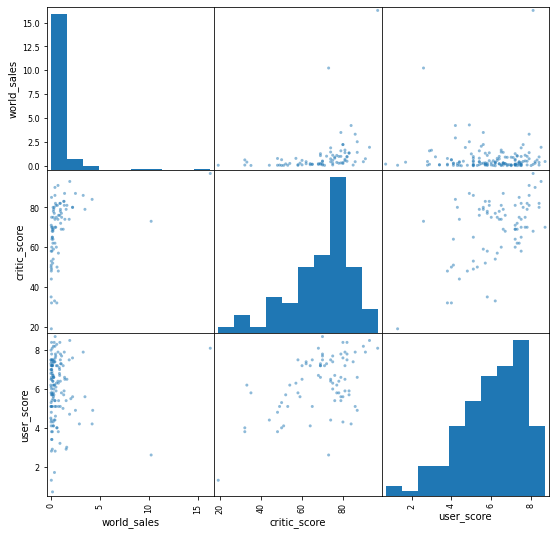

In [49]:
pd.plotting.scatter_matrix(X360_critic_and_user_ratings, figsize=(9,9))

In [50]:
_3DS_critic_and_user_ratings = _3DS_actual_data_games.loc[:,['world_sales', 'critic_score', 'user_score']]
_3DS_critic_and_user_ratings.head()

,world_sales,critic_score,user_score
33,14.599999,NaN,NaN
47,11.680000,NaN,NaN
96,7.550000,NaN,NaN
108,7.140000,NaN,NaN
184,5.220000,NaN,NaN


In [51]:
_3DS_critic_and_user_ratings.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


array([[<AxesSubplot:xlabel='world_sales', ylabel='world_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='world_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='world_sales'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

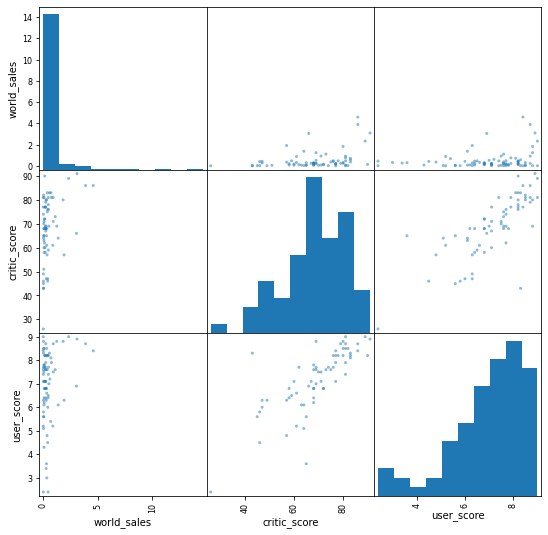

In [52]:
pd.plotting.scatter_matrix(_3DS_critic_and_user_ratings, figsize=(9,9))

Платформы PS3, XOne и X360 имеют похожие тенденции и зависимости, как у платформы PS4

У платформы 3DS продажи имеют прямую связь от рейтинга игроков. 

9 вопрос. Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [53]:
genre_pivot_table = pd.pivot_table(actual_data_games, index='genre', values='world_sales', aggfunc='sum')
genre_pivot_table.sort_values('world_sales', ascending=False)

,world_sales
genre,
Action,321.869995
Shooter,232.979996
Sports,150.649994
Role-Playing,145.889999
Misc,62.820000
Platform,42.630001
Racing,39.889999
Fighting,35.310001
Adventure,23.639999


Самые прибыльные жанры - Action, Shooter, Sports, Role_Playing. 

С 2013 по 2016 год не пользуются популярностью приключения, симуляторы, стратегии и мозаики.

Text(0.5, 1.0, 'Распределение прибыли по жанрам')

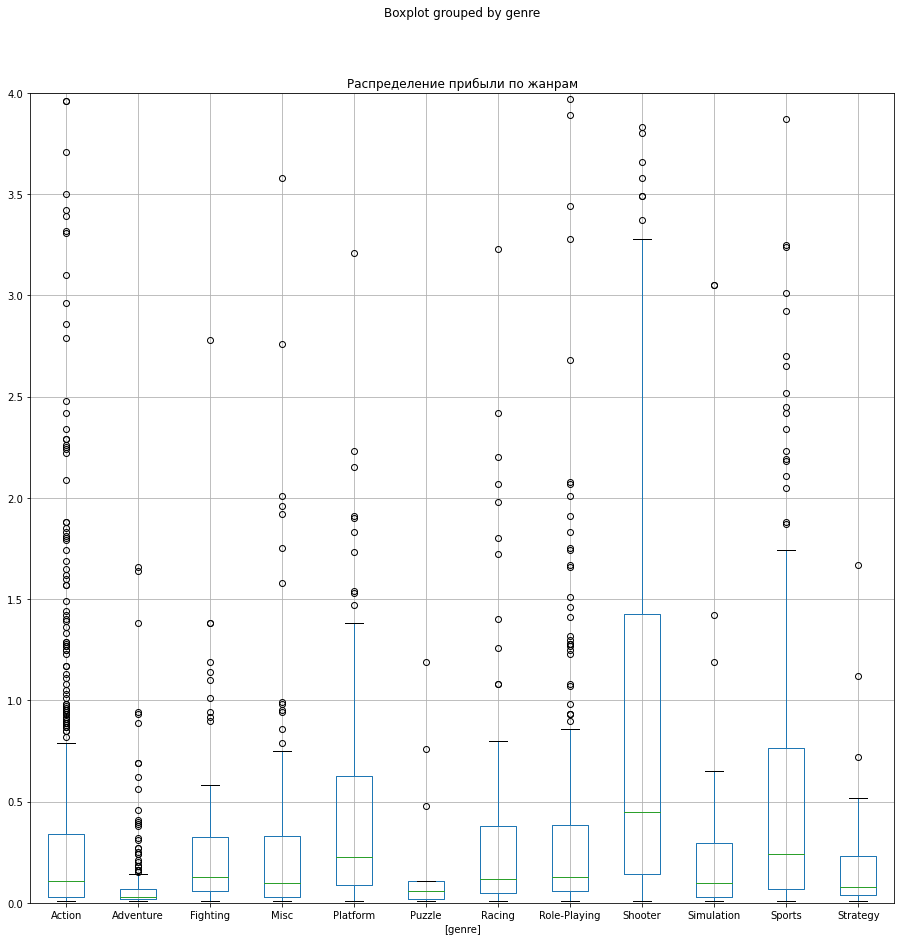

In [54]:
boxplot = actual_data_games.boxplot(column=['world_sales' ], by = ['genre'], figsize=(15,15))

ymin, ymax = [0, 4]
boxplot.set_ylim([ymin, ymax])
boxplot.set_title('Распределение прибыли по жанрам')

Самые прибыльные жанры - Action, Sports, Role_Playing. 

Вывод:
На каждый вопрос ответы даны отдельно.

Общий вывод - на 2017 год ожидается подьем продаж трех платформ - PS4, XOne и 3DS

# Шаг 4. Составление портрета пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишем различия в долях продаж.
Самые популярные жанры (топ-5). 
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [55]:
# рассмотрим строчки с ненулевыми продажами
na_actual_data_games = actual_data_games.query('na_sales > 0')
na_actual_data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 16 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1309 non-null   object 
 1   platform         1309 non-null   object 
 2   year_of_release  1309 non-null   int64  
 3   genre            1309 non-null   object 
 4   na_sales         1309 non-null   float32
 5   eu_sales         1309 non-null   float32
 6   jp_sales         1309 non-null   float32
 7   other_sales      1309 non-null   float32
 8   critic_score     809 non-null    float32
 9   user_score       974 non-null    float32
 10  rating           1309 non-null   object 
 11  world_sales      1309 non-null   float32
dtypes: float32(7), int64(1), object(4)
memory usage: 97.2+ KB


In [56]:
eu_actual_data_games = actual_data_games.query('eu_sales > 0')
eu_actual_data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1422 non-null   object 
 1   platform         1422 non-null   object 
 2   year_of_release  1422 non-null   int64  
 3   genre            1422 non-null   object 
 4   na_sales         1422 non-null   float32
 5   eu_sales         1422 non-null   float32
 6   jp_sales         1422 non-null   float32
 7   other_sales      1422 non-null   float32
 8   critic_score     872 non-null    float32
 9   user_score       1047 non-null   float32
 10  rating           1422 non-null   object 
 11  world_sales      1422 non-null   float32
dtypes: float32(7), int64(1), object(4)
memory usage: 105.5+ KB


In [57]:
jp_actual_data_games = actual_data_games.query('jp_sales > 0')
jp_actual_data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1187 non-null   object 
 1   platform         1187 non-null   object 
 2   year_of_release  1187 non-null   int64  
 3   genre            1187 non-null   object 
 4   na_sales         1187 non-null   float32
 5   eu_sales         1187 non-null   float32
 6   jp_sales         1187 non-null   float32
 7   other_sales      1187 non-null   float32
 8   critic_score     410 non-null    float32
 9   user_score       462 non-null    float32
 10  rating           1187 non-null   object 
 11  world_sales      1187 non-null   float32
dtypes: float32(7), int64(1), object(4)
memory usage: 88.1+ KB


In [58]:
na_platform_pivot_table = pd.pivot_table(na_actual_data_games, index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_platform_pivot_table

,na_sales
platform,
PS4,108.739998
XOne,93.120003
X360,81.659996
PS3,63.500000
3DS,38.200001
WiiU,29.209999
PC,11.110000
Wii,6.560000
PSV,5.040000


In [59]:
eu_platform_pivot_table = pd.pivot_table(eu_actual_data_games, index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_platform_pivot_table

,eu_sales
platform,
PS4,141.089996
PS3,67.809998
XOne,51.590000
X360,42.520000
3DS,30.959999
PC,25.360001
WiiU,19.850000
PSV,6.100000
Wii,5.930000


In [60]:
jp_platform_pivot_table = pd.pivot_table(jp_actual_data_games, index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_platform_pivot_table

,jp_sales
platform,
3DS,67.809998
PS3,23.350000
PSV,18.590000
PS4,15.960000
WiiU,10.880000
PSP,3.290000
X360,0.510000
XOne,0.340000
Wii,0.050000


Рейтинг платформ:

Топ 5 в Северной Америке: PS4, XOne, X360, PS3 и 3DS
Топ 5 в Европе: PS4, PS3, XOne, X360 и 3DS
Топ 5 в Японии: 3DS, PS3, PSV, PS4 и WiiU
Во всех странах с высоким рейтингом продаж есть PS, то есть бренд делает свое дело. Есть влияние расположение компании, то есть лидирующие на рынке в стране компании продают самые продаваемые игры. На Американском рынке между собой соревнуются PS4 и XOne.  В Европе из-за отсутствия собственных крупнейших компаний хорошо продается PS4. В Японии соревнуются 3DS и PS3, при этом в родной стране PS3 продается лучше

Найдем самые популярные жанры

In [61]:
na_genre_pivot_table = pd.pivot_table(na_actual_data_games, index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_genre_pivot_table

,na_sales
genre,
Action,126.050003
Shooter,109.739998
Sports,65.269997
Role-Playing,46.400002
Misc,27.490000
Platform,18.139999
Fighting,15.550000
Racing,12.960000
Adventure,7.140000


In [62]:
eu_genre_pivot_table = pd.pivot_table(eu_actual_data_games, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_genre_pivot_table

,eu_sales
genre,
Action,118.129997
Shooter,87.860001
Sports,60.520000
Role-Playing,36.970001
Racing,20.190001
Misc,20.039999
Platform,15.580000
Simulation,10.920000
Fighting,8.550000


In [63]:
jp_genre_pivot_table = pd.pivot_table(jp_actual_data_games, index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_genre_pivot_table

,jp_sales
genre,
Role-Playing,51.040001
Action,40.490002
Misc,9.200000
Fighting,7.650000
Shooter,6.610000
Adventure,5.820000
Sports,5.410000
Platform,4.790000
Simulation,4.520000


Рейтинг жанров:

Топ 5 в Северной Америке: Action, Shooter, Sports, Role-Playing и Misc
Топ 5 в Европе: Action, Shooter, Sports, Role-Playing и Racing
Топ 5 в Японии: Role-Playing, Action, Misc, Fighting и Shooter

В Америке и Европе интересуются похожими жанрами. В Японии превалируют в основном другие жанры

Посмотрим, как влияет рейтинг в каждом регионе

In [64]:
na_rating_pivot_table = pd.pivot_table(na_actual_data_games, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_rating_pivot_table

,na_sales
rating,
M,165.210007
undefined,89.419998
E,79.050003
E10+,54.240002
T,49.790001


In [65]:
eu_rating_pivot_table = pd.pivot_table(eu_actual_data_games, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_rating_pivot_table

,eu_sales
rating,
M,145.320007
E,83.360001
undefined,78.909996
E10+,42.689999
T,41.950001


In [66]:
jp_rating_pivot_table = pd.pivot_table(jp_actual_data_games, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_rating_pivot_table

,jp_sales
rating,
undefined,85.050003
T,20.590000
E,15.140000
M,14.110000
E10+,5.890000


В Америке и Европе популярны игры с возрастным рейтингом - 17+. Значит, в основном, там взрослые пользователи.
В Японии возрастной рейтинг ниже - 13+. То есть игры создаются и для более молодого поколения

Вывод по шагу 4.

В Америке игроки - от 17 лет, у них популярны PS4 и XOne, они любят экшен и стрелялки
В Европе - игрок от 17 лет, популярна платформа PS4, любят стрелялки и экшен.
В Японии - игроки от 13 лет, играют в основном на 3DS или PSV, Играют в ролевые и экшен

# Шаг 5. Проверка гипотез

Проверим гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Определим пороговое значение alpha = 0.05

Гипотеза № 1:
средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [67]:
user_ratings_XOne = actual_data_games[actual_data_games['platform']=="XOne"]['user_score'].dropna() 
user_ratings_PC  = actual_data_games[actual_data_games['platform']=="PC"]['user_score'].dropna()

In [68]:
from scipy.stats import levene
stat, p = levene(user_ratings_XOne, user_ratings_PC)
p

0.00389754886889314

In [69]:
alpha = 0.05 

results_1 = st.ttest_ind(
    user_ratings_XOne, 
    user_ratings_PC,
    equal_var = True)

print('p-значение:', results_1.pvalue)

if (results_1.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14012765210016784
Не получилось отвергнуть нулевую гипотезу


Вывод

Не получилось отвергнуть нулевую гипотезу.

Верно следующее утверждение: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Гипотеза № 2:
средние пользовательские рейтинги жанров Action и Sports разные.

Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.

Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [70]:
genre_action_games = actual_data_games[actual_data_games['genre']=="Action"]['user_score'].dropna()
genre_sports_games = actual_data_games[actual_data_games['genre']=="Sports"]['user_score'].dropna()

In [71]:
alpha = 0.05 

results_2 = st.ttest_ind(
    genre_action_games, 
    genre_sports_games,
    equal_var = False)

print('p-значение:', results_2.pvalue)

if (results_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4459989209941613e-20
Отвергаем нулевую гипотезу


Вывод

Отвергаем нулевую гипотезу. Таким образом, остается верным утверждение, что средние пользовательские рейтинги жанров Action и Sports отличаются

Итоговый вывод
Были загружены данные, осуществлена преодбработка таблицы, заменены столбцы, обработаны пропуски, удалены дубликаты
Выделены актуальные данные
Составлены портреты пользователей для разных регионов
Проверены гипотезы

Продажи зависят от того, на какой платформе она создана, региона создателя и жанра.

Популярны компании, которые давно существуют на рынке, у них большое кол-во фанатов по всему миру.

Влияние платформы - чем лучше техническая составляющая, тем лучше сама игра. Самые популярные платформы -  PS4, XOne и 3DS.

Жанров лидирующих несколько, разные запросы потребителей, но лидирующие - экшен, стрелялки, спортивные игры и ролевые.

Общий возраст, на который рассчитаны игры - от 17 лет